**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,C,Cherbourg,True


**Exploratory Data Analysis**

In [7]:
## See the total of all null values
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [8]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [9]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

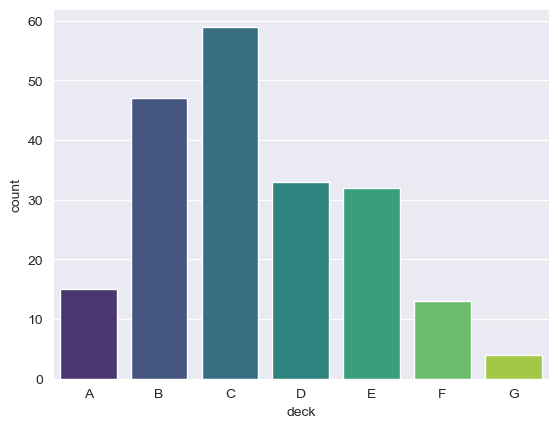

In [10]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis" )   

<Axes: xlabel='deck', ylabel='count'>

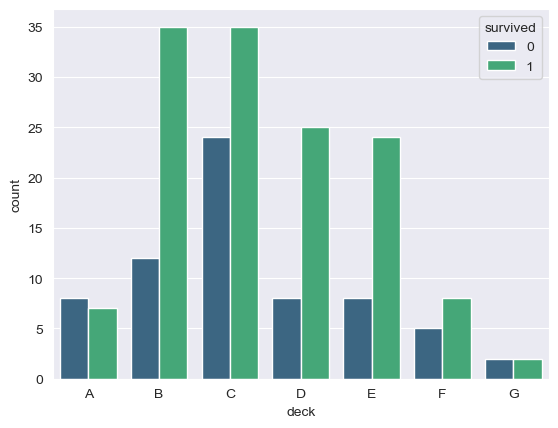

In [11]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, hue = "survived", palette = "viridis" )   

In [12]:
df.drop(["deck"], axis =1, inplace = True)

In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


<Axes: xlabel='pclass', ylabel='age'>

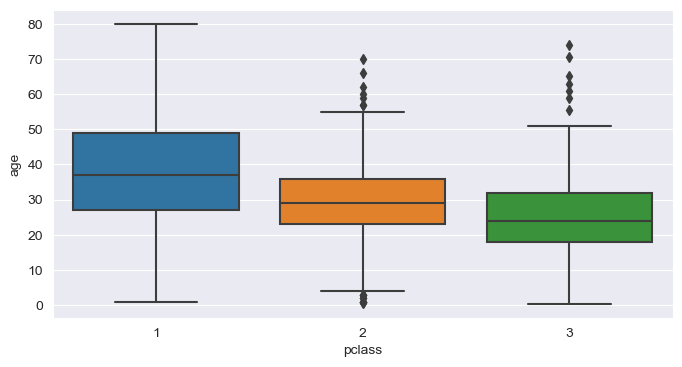

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize = (8, 4))
sns.boxplot(x = "pclass", y = "age", data = df)

In [15]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [16]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [17]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [18]:
df.dropna(inplace = True)

In [19]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


#### Checking for the number of survivours

<Axes: xlabel='survived', ylabel='count'>

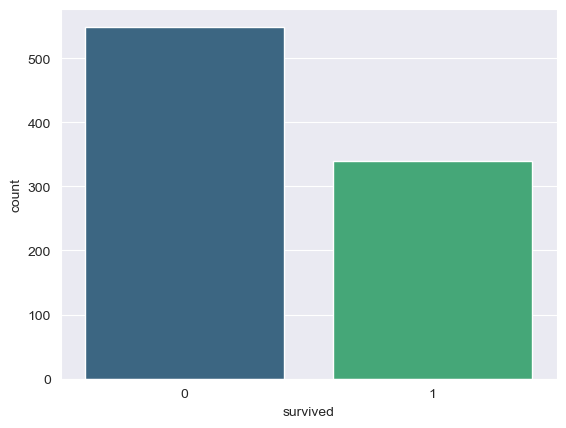

In [20]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [21]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

#### What might have impacted the survival of the sailors?
##### Lets look at the "alone" variable

<Axes: xlabel='survived', ylabel='count'>

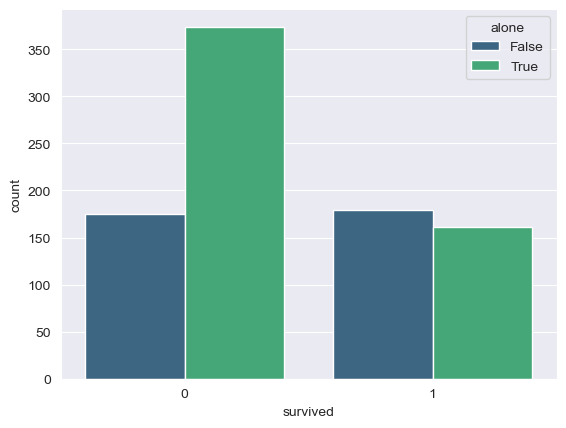

In [22]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "alone", data = df, palette = "viridis")

- Most of those who died were alone.
- Those who were not alone seem to have had a higher chance of survival

##### What about the effect of being an adult male?

- There are many theories that children and women were given priority to use the few lifeguard boats that were there.
- This was at the expense of the adults males onboard.
- Let's examine this>>>>>

<Axes: xlabel='survived', ylabel='count'>

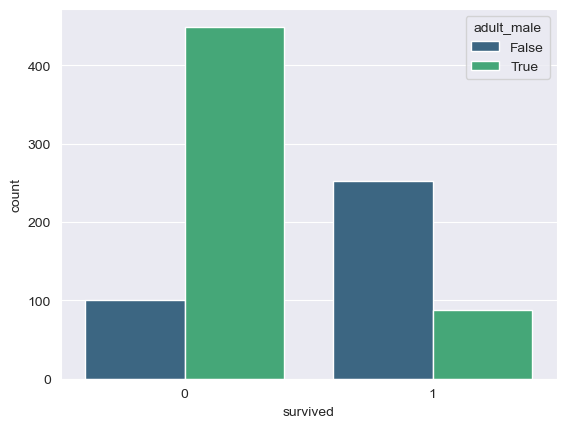

In [23]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "adult_male", data = df, palette = "viridis")

- This confirms that many adult males went down with the ship that fateful day.

##### More confirmation

<Axes: xlabel='survived', ylabel='count'>

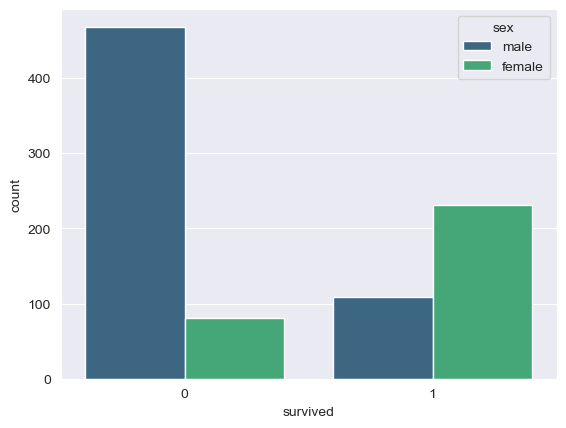

In [24]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "sex", data = df, palette = "viridis")

In [25]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,23.0,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


#### Did the embark location have an imact on Survival

<Axes: xlabel='survived', ylabel='count'>

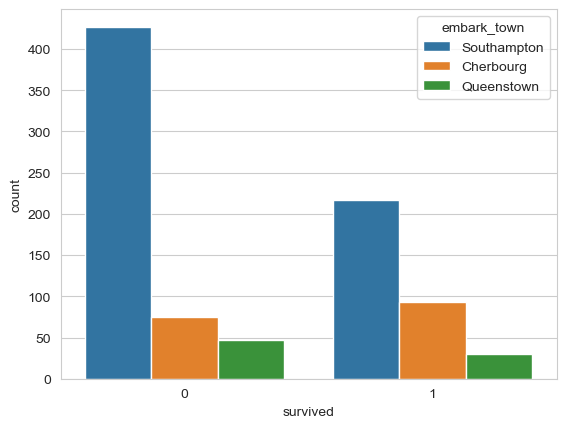

In [26]:
sns.set_style("whitegrid")
sns.countplot(x = "survived", hue = "embark_town", data = df)

- Most of those who died boarded the Ship from Soutampton
- A significantly higher number of those who boarded the ship from Cherbourg survived

In [27]:
 df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='sibsp', ylabel='count'>

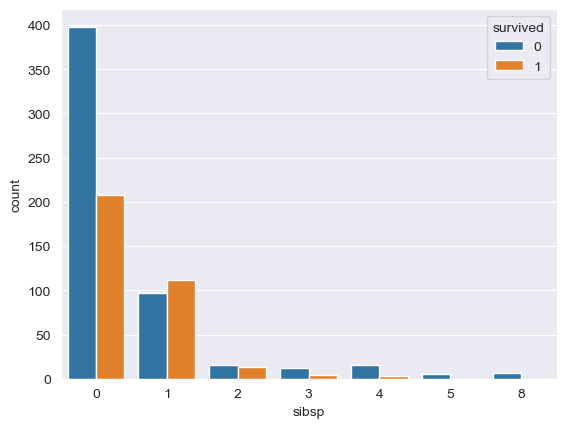

In [28]:
sns.set_style("darkgrid")
sns.countplot(x = "sibsp", hue = "survived", data = df)

#### Examinig the age distribution of aall the titanic sailors

<Axes: xlabel='age', ylabel='Density'>

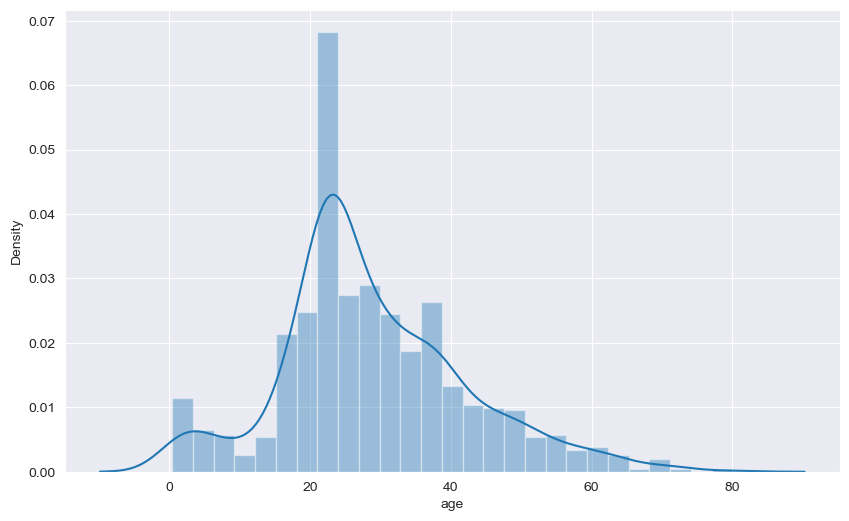

In [29]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"])

#### Examining the fare paind by the sailors

<Axes: xlabel='fare', ylabel='Density'>

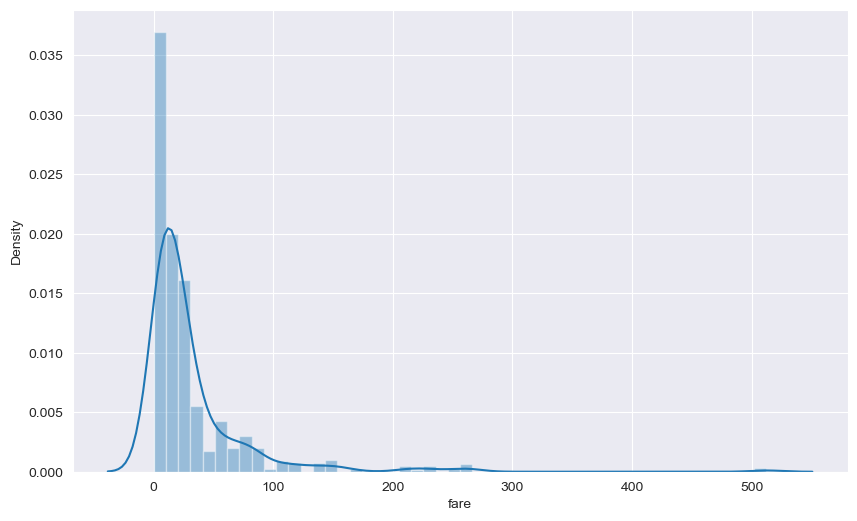

In [30]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"])

#### Correlation Heatmap

In [31]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

ValueError: could not convert string to float: 'male'

<Figure size 1000x600 with 0 Axes>

In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,23.0,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


In [33]:
df.drop(["sibsp", "age", "parch"], axis = 1, inplace = True)

In [34]:
df

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,man,True,Southampton,True
887,1,1,female,30.0000,woman,False,Southampton,True
888,0,3,female,23.4500,woman,False,Southampton,False
889,1,1,male,30.0000,man,True,Cherbourg,True


In [39]:
sex = pd.get_dummies(df["sex"], drop_first = True)
who = pd.get_dummies(df["who"], drop_first = True)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
alone = pd.get_dummies(df["alone"], drop_first = True)

In [40]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [42]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,...,True,Queenstown,Southampton,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,True,True,...,True,False,True,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,...,False,False,True,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,...,False,False,True,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,...,True,False,True,True,True,False,True,False,True,True


In [43]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [44]:
df.head()

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,True,True,False,True,False,True,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True,True,False,True,False,True,True
